**Mounting Google Cloab with Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***********************************************************************

In [2]:
import pandas as pd
import os

**Reading the csv file that contains the patients info**

In [3]:
df= pd.read_csv("/content/drive/MyDrive/Covid19 CT Classification /Covid19Dataset/patients_status.csv")

**Showing hw labels of this file**

In [4]:
df

,Unnamed: 0,id,status,DataType
0,0,4077.jpg.jpg,0,TRAIN
1,1,4078.jpg.jpg,0,TRAIN
2,2,4079.jpg.jpg,0,TRAIN
3,3,4080.jpg.jpg,0,TRAIN
4,4,4081.jpg.jpg,0,TRAIN
...,...,...,...,...
5263,2561,2127.jpg.jpg,1,TEST
5264,2562,2128.jpg.jpg,1,TEST
5265,2563,2129.jpg.jpg,1,TEST
5266,2564,2130.jpg.jpg,1,TEST


**SPLITTING THE DATA into train and test depending on csv file**

**Get the path of the positive images that we applied Morphology operation on it**

In [5]:
imgs = r'/content/drive/MyDrive/Covid19 CT Classification /Covid19Dataset/Positive_Morph'

**Create a folder Covid Train**

In [7]:
TARGET_DIR = "/content/drive/MyDrive/Covid19 CT Classification /DataResNet/Train "
import os
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created") 
else:
  print("already existed")

Covid FOlder Created


**Copy images from positive morph to covid train folder**

**Only images they have status = 1 && datatype= train in csv file**

In [9]:
cnt = 0
TARGET_DIR = '/content/drive/MyDrive/Covid19 CT Classification /DataResNet/Train/Covid'
import shutil
for(i,row) in df.iterrows():
    if row["status"] == 1 and row["DataType"] =="TRAIN":
        filename = row["id"]
        image_path = os.path.join(imgs,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       # print("Moving Image",cnt)
        cnt+=1

KeyboardInterrupt: ignored

**Count the number of train covid images**

In [ ]:
import os
from PIL import Image

f = r'/content/drive/MyDrive/DataResNet/Train/Covid'
j=0
for file in os.listdir(f):
    f_img = f+"/"+file
    j+=1
print(j)

2052


**We will do the same operations to (train Non_covid && test covid && test non covid)**

**Train Non_Covid**

In [ ]:
imgs = r'/content/drive/MyDrive/Covid19Dataset/Negative_Morph'
filep = r'/content/drive/MyDrive/Covid19Dataset/patients_status.csv'
TARGET_DIR = "/content/drive/MyDrive/DataResNet/Train/Non-covid"

In [ ]:
cnt = 0
import shutil
for(i,row) in df.iterrows():
    if row["status"] == 0 and row["DataType"] =="TRAIN":
        filename = row["id"]
        image_path = os.path.join(imgs,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       # print("Moving Image",cnt)
        cnt+=1

In [ ]:
import os
from PIL import Image

f = r'/content/drive/MyDrive/DataResNet/Train/Non-covid'
j=0
for file in os.listdir(f):
    f_img = f+"/"+file
    j+=1
print(j)

2161


**Test Covid**

In [ ]:
TARGET_DIR = "/content/drive/MyDrive/data/Test/Covid"
import os
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created") 
else:
  print("already existed")

Covid FOlder Created


In [ ]:
imgs = r'/content/drive/MyDrive/Covid19Dataset/Positive_Morph'
filep = r'/content/drive/MyDrive/Covid19Dataset/patients_status.csv'
Covid = "/content/drive/MyDrive/DataResNet/Test/Covid"

In [ ]:
cnt = 0
import shutil
for(i,row) in df.iterrows():
    if row["status"] == 1 and row["DataType"] =="TEST":
        filename = row["id"]
        image_path = os.path.join(imgs,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(Covid,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory

       # print("Moving Image",cnt)
        cnt+=1

In [ ]:
import os
from PIL import Image

f = "/content/drive/MyDrive/DataResNet/Test/Covid"
j=0
for file in os.listdir(f):
    f_img = f+"/"+file
    j+=1
print(j)

514


**Test Non_Covid**

In [ ]:
TARGET_DIR = "/content/drive/MyDrive/DataResNet/Test/Non-Covid"
import os
if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Non_Covid FOlder Created") 
else:
  print("already existed")

Non_Covid FOlder Created


In [ ]:
imgs = r'/content/drive/MyDrive/Covid19Dataset/Negative_Morph'
filep = r'/content/drive/MyDrive/Covid19Dataset/patients_status.csv'
Non_Covid = "/content/drive/MyDrive/DataResNet/Test/Non-Covid"

In [ ]:
cnt = 0
import shutil
for(i,row) in df.iterrows():
    if row["status"] == 0 and row["DataType"] =="TEST":
        filename = row["id"]
        image_path = os.path.join(imgs,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(Non_Covid,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
       # print("Moving Image",cnt)
        cnt+=1

In [ ]:
import os
from PIL import Image

f = "/content/drive/MyDrive/DataResNet/Test/Non-Covid"
j=0
for file in os.listdir(f):
    f_img = f+"/"+file
    j+=1
print(j)

541


**ResNet_50** 

**Import the needed libraries**

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import os
import cv2
import shutil
import matplotlib.pyplot as plt

**The shape for every image is 224*224*3**

In [ ]:
INPUT_SHAPE = (224,224,3) 

#get the pretrained model
base_model = tf.keras.applications.ResNet50(input_shape= INPUT_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
base_model.summary()#GET A CLOSE LOOK TO THIS MODEL AND ITS ARCHITECTURE

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
model2 = Sequential()
model2.add(base_model)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(128))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 23,850,113
Trainable params: 262,401
Non-trainable params: 23,587,712
____________________________________

In [ ]:
callbacks2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model2.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255, rotation_range = 0.2, 
                              zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1/255) 

**Passing the paths of the data**

In [ ]:
train_path = '/content/drive/MyDrive/DataResNet/Train'
# train_path += '/content/drive/MyDrive/augmented/Train/Non_covid'
test_path = '/content/drive/MyDrive/DataResNet/Test'
train_gen = train_datagen.flow_from_directory(train_path, target_size = (224,224),
                                             batch_size = 50, class_mode = 'binary', 
                                              subset= 'training')
valid_gen = train_datagen.flow_from_directory(train_path, target_size = (224,224),
                                             batch_size = 50, class_mode = 'binary', 
                                              subset= 'validation')
test_gen = test_datagen.flow_from_directory(test_path, target_size = (224,224),
                                             batch_size = 50, class_mode = 'binary')

Found 3371 images belonging to 2 classes.
Found 842 images belonging to 2 classes.
Found 1055 images belonging to 2 classes.


**Fit the model in 5 epochs**

In [ ]:
model2.fit(train_gen, validation_data = valid_gen, epochs = 5, 
                    callbacks = [callbacks2], verbose = 1) 

Epoch 1/5
68/68 [==============================] - 62s 873ms/step - loss: 0.3107 - accuracy: 0.8582 - val_loss: 0.1459 - val_accuracy: 0.9466
Epoch 2/5
68/68 [==============================] - 57s 839ms/step - loss: 0.1486 - accuracy: 0.9442 - val_loss: 0.1107 - val_accuracy: 0.9549
Epoch 3/5
68/68 [==============================] - 57s 835ms/step - loss: 0.1153 - accuracy: 0.9567 - val_loss: 0.0874 - val_accuracy: 0.9798
Epoch 4/5
68/68 [==============================] - 57s 838ms/step - loss: 0.1146 - accuracy: 0.9567 - val_loss: 0.0575 - val_accuracy: 0.9822
Epoch 5/5
68/68 [==============================] - 57s 834ms/step - loss: 0.1009 - accuracy: 0.9644 - val_loss: 0.0487 - val_accuracy: 0.9774


**We can see the accuracy for train as 0.9644 while the accuracy for the test set has improved to 0.9774 after 5 epochs which is a good result**

**ResNet_18** 

**Import libraries**

In [ ]:
#Import necessary libraries
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim 
from torchvision import transforms, utils, models

**Pass the path of the data and make some operations to images like : random rotation , resize and normalize**

In [ ]:
data_dir = "/content/drive/MyDrive/DataResNet/"

train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])




**Paths for train and test data**

In [ ]:
train_data = datasets.ImageFolder(data_dir + 'Train', transform=train_transforms)

In [ ]:
 test_data = datasets.ImageFolder(data_dir + 'Test', transform=test_transforms)

**Print the shape of images**

In [ ]:
for image,label in train_data:
    print(image.shape)
    break

torch.Size([3, 224, 224])


**DataLoader**
**Creating a PyTorch Dataset and managing it with Dataloader keeps your data manageable and helps to simplify your machine learning pipeline. a Dataset stores all your data, and Dataloader is can be used to iterate through the data, manage batches, transform the data, and much more.**

In [ ]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64,shuffle=True)

**Now our data was mixed after shuffeling to make sure our model gives us the best performance**

In [ ]:
iter_ = iter(trainloader)
image,label = next(iter_)
print(image.shape)
print(label)

torch.Size([64, 3, 224, 224])
tensor([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0])


In [ ]:
def image_convert(img):
    img = img.clone().cpu().numpy()
    img = img.transpose(1,2,0)
    std = [0.5,0.5,0.5]
    mean = [0.5,0.5,0.5]
    img = img*std + mean
    return img

In [ ]:
def plot_10():
        iter_ = iter(trainloader)
        images,labels = next(iter_)
        an_ = {'0':'Non_Covid','1':'Covid'}
        
        plt.figure(figsize=(20,10))
        for idx in range(10):
            plt.subplot(2,5,idx+1)
            img = image_convert(images[idx])
            label = labels[idx]
            plt.imshow(img)
            plt.title(an_[str(label.numpy())])
        plt.show()

**Showing images from the train set specifically trainloader**

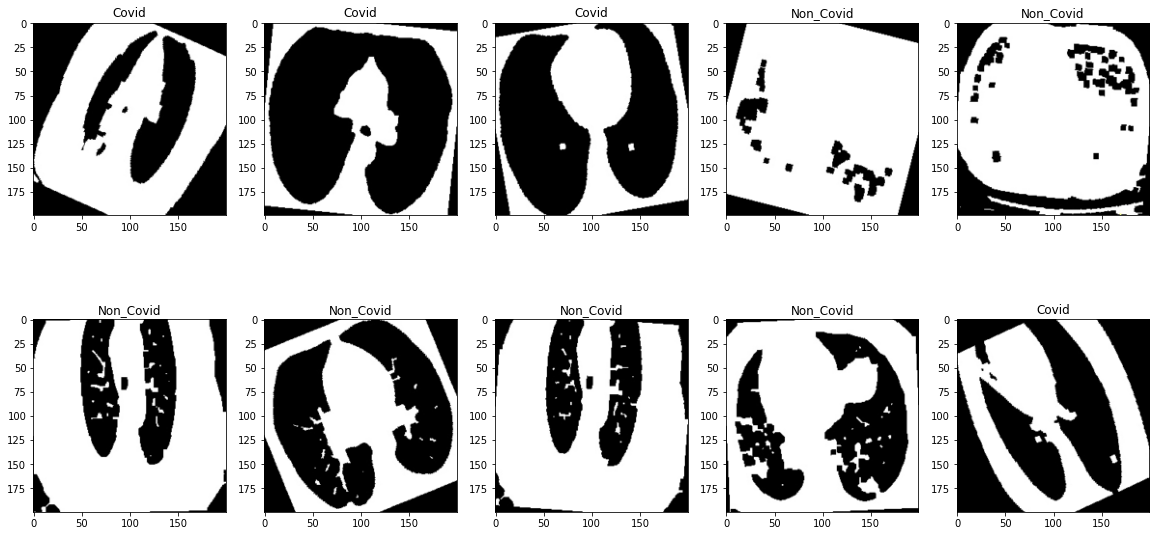

In [ ]:
plot_10()

**Call our pretrained model RESNET18**

In [ ]:
model =  models.resnet18(pretrained=True)
print(model)#LOOK AT RESNET_18 ARCHITECTURE

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
from torch import nn
class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1=nn.Linear(512,120)
        self.linear2=nn.Linear(120,2)
    
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = self.linear2(x)
        return x

In [ ]:
model_ = Dc_model()

In [ ]:
model.fc = model_

In [ ]:
for param in model.parameters():
        param.requires_grad = False
for param in model.fc.parameters():
        param.requires_grad = True

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

**Fit the data on 5 epochs**

In [ ]:
train_loss = []
val_loss = []

epochs = 5

for epoch in range(epochs):
      print("epoch {}/{}".format(epoch+1,epochs))
      running_loss = 0.0
      running_score = 0.0
#       model.train()
      for image,label in trainloader:
          image = image
          label = label
          optimizer.zero_grad()
          y_pred = model.forward(image)
          loss = criterion(y_pred,label)         
          loss.backward() #calculate derivatives 
          optimizer.step() # update parameters
          val, index_ = torch.max(y_pred,axis=1)
          running_score += torch.sum(index_ == label.data).item()
          running_loss += loss.item()
      
      epoch_score = running_score/len(trainloader.dataset)
      epoch_loss = running_loss/len(trainloader.dataset)
      train_loss.append(epoch_loss)
      print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
      with torch.no_grad():
          model.eval()
          running_loss = 0.0
          running_score = 0.0
          for image,label in testloader:
                image = image
                label = label
                optimizer.zero_grad()
                y_pred = model.forward(image)
                loss = criterion(y_pred,label)
                running_loss += loss.item()

                val, index_ = torch.max(y_pred,axis=1)
                running_score += torch.sum(index_ == label.data).item()
          
          epoch_score = running_score/len(testloader.dataset)
          epoch_loss = running_loss/len(testloader.dataset)
          val_loss.append(epoch_loss)
          print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))

epoch 1/5
Training loss: 0.001586164162027144, accuracy: 0.9672442440066461
Validation loss: 0.0003839373818082267, accuracy: 0.995260663507109
epoch 2/5
Training loss: 0.00030182560703766024, accuracy: 0.9938286256824116
Validation loss: 0.00025253002156649154, accuracy: 0.9971563981042654
epoch 3/5
Training loss: 0.0001473214422367423, accuracy: 0.9971516733918823
Validation loss: 0.00019862536513092112, accuracy: 0.9933649289099526
epoch 4/5
Training loss: 0.0001547456161677108, accuracy: 0.9969143128412058
Validation loss: 0.0001939644831810941, accuracy: 0.9971563981042654
epoch 5/5
Training loss: 0.00010113102530183745, accuracy: 0.9978637550439117
Validation loss: 0.00015573381789478857, accuracy: 0.9962085308056872


**We got a great accuracy for train 0.9978 and for test 0.9962**

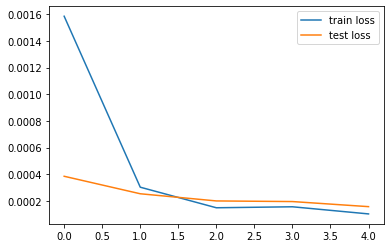

In [ ]:
plt.plot(train_loss,label='train loss')
plt.plot(val_loss,label='test loss')
plt.legend()
plt.show()

**Test our results on testing set**

In [ ]:
def plot_val_images():

    label_dict = ['Covid','Non_Covid']
 
    iter_ = iter(testloader)
    images,labels = next(iter_)
    images = images
    pred_labels = labels

    
    img_out = model.forward(images)
    value, index_val = torch.max(img_out, 1)

    # label = label_dict[str(label)]
    fig = plt.figure(figsize=(35,9))
    for idx in np.arange(10):
        ax = fig.add_subplot(2,5,idx+1)
        plt.imshow(image_convert(images[idx]))
        label = labels[idx]  
        pred_label = pred_labels[idx]
        ax.set_title('Act {},pred {}'.format(label_dict[label],label_dict[pred_label]))

In [ ]:
plot_val_images()

**Squeeze_Net**  : 

In [ ]:
from torchvision import datasets, transforms

In [ ]:
data_dir = "/content/drive/MyDrive/DataResNet/"

In [ ]:
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                transforms.RandomHorizontalFlip(),
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])
test_transforms = transforms.Compose([
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5],
                                [0.5, 0.5, 0.5])])

train_data = datasets.ImageFolder(data_dir + 'Train', transform=train_transforms)
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)

In [ ]:
test_data = datasets.ImageFolder(data_dir + 'Test', transform=train_transforms)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64, shuffle=True)

In [ ]:
from torchvision import models
from torch.optim import lr_scheduler

**Import Squeezenet1_1**

In [ ]:
model_ft = models.squeezenet1_1(pretrained=True)
model_ft.classifier._modules["1"] = nn.Conv2d(512, 58, kernel_size=(1, 1))
model_ft.num_classes = 58
for param in model_ft.parameters():
    param.requires_grad = False
for param in model_ft.classifier.parameters():
    param.requires_grad = True

Downloading: "https://download.pytorch.org/models/squeezenet1_1-b8a52dc0.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_1-b8a52dc0.pth


  0%|          | 0.00/4.73M [00:00<?, ?B/s]

In [ ]:
from torchvision import models
from torch.optim import lr_scheduler

In [ ]:
model_ft = models.squeezenet1_1(pretrained=True)
model_ft.classifier._modules["1"] = nn.Conv2d(512, 58, kernel_size=(1, 1))
model_ft.num_classes = 58
for param in model_ft.parameters():
    param.requires_grad = False
for param in model_ft.classifier.parameters():
    param.requires_grad = True

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

**Fit the data on 5 epochs**

In [ ]:
train_loss = []
val_loss = []

epochs = 5

for epoch in range(epochs):
      print("epoch {}/{}".format(epoch+1,epochs))
      running_loss = 0.0
      running_score = 0.0
#       model.train()
      for image,label in trainloader:
          image = image
          label = label
          optimizer_ft.zero_grad()
          y_pred = model_ft.forward(image)
          loss = criterion(y_pred,label)         
          loss.backward() #calculate derivatives 
          optimizer_ft.step() # update parameters
          
          val, index_ = torch.max(y_pred,axis=1)
          running_score += torch.sum(index_ == label.data).item()
          running_loss += loss.item()
      
      epoch_score = running_score/len(trainloader.dataset)
      epoch_loss = running_loss/len(trainloader.dataset)
      train_loss.append(epoch_loss)
      print("Training loss: {}, accuracy: {}".format(epoch_loss,epoch_score))
      
      with torch.no_grad():
          model_ft.eval()
          running_loss = 0.0
          running_score = 0.0
          for image,label in testloader:
                image = image
                label = label
                optimizer_ft.zero_grad()
                y_pred = model_ft.forward(image)
                loss = criterion(y_pred,label)
                running_loss += loss.item()

                val, index_ = torch.max(y_pred,axis=1)
                running_score += torch.sum(index_ == label.data).item()
          
          epoch_score = running_score/len(testloader.dataset)
          epoch_loss = running_loss/len(testloader.dataset)
          val_loss.append(epoch_loss)
          print("Validation loss: {}, accuracy: {}".format(epoch_loss,epoch_score))

epoch 1/5
Training loss: 0.009006662342459523, accuracy: 0.8269641585568479
Validation loss: 0.001382619492109353, accuracy: 0.9725118483412323
epoch 2/5
Training loss: 0.0010024846084690027, accuracy: 0.9821979586992642
Validation loss: 0.0009929417416241497, accuracy: 0.9781990521327014
epoch 3/5
Training loss: 0.0007841509068108442, accuracy: 0.9881319724661761
Validation loss: 0.0007786978698242897, accuracy: 0.9829383886255925
epoch 4/5
Training loss: 0.0006596761608198763, accuracy: 0.9893187752195585
Validation loss: 0.0007347552635446544, accuracy: 0.9838862559241706
epoch 5/5
Training loss: 0.0005329015812644929, accuracy: 0.9914550201756468
Validation loss: 0.0006694937786926025, accuracy: 0.9848341232227488


**We got a good accuracy on train 0.9914 and on test 0.9848**

**Comparing between the three models that we applied on our dataset we notice that ResNet18 gave the best accuracy on yest set**

**Notice : Every model has almost taken 30 minutes to train on GPU colab**